Model trained successfully: <xgboost.core.Booster object at 0x0000028861423470>
Validation RMSE: 25052.45
Validation R² Score: 0.9182 (91.82% accuracy)


<Figure size 1200x800 with 0 Axes>

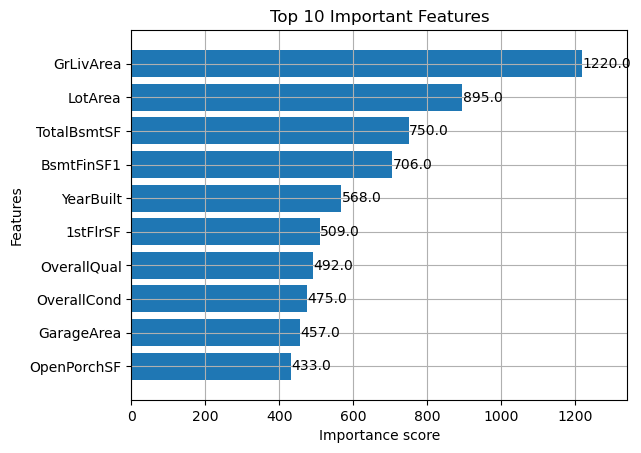

Model saved as house_price_model.pkl


In [5]:
# 🛠️ Step 1: Import Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import DMatrix, train as xgb_train, plot_importance
import matplotlib.pyplot as plt
import joblib  # To save the model

# 🏡 Step 2: Load Dataset
train = pd.read_csv("C:/Users/arjun/Downloads/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("C:/Users/arjun/Downloads/house-prices-advanced-regression-techniques/test.csv")

# 🧹 Step 3: Data Preprocessing
# Drop columns with more than 80% missing values
null_percent = train.isnull().sum() / len(train)
cols_to_drop = null_percent[null_percent > 0.8].index
train = train.drop(cols_to_drop, axis=1)

# Fill missing values
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

# Label Encoding for categorical variables
cat_cols = train.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col])

# ✂️ Step 4: Split into Train and Validation sets
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Step 5: Prepare DMatrix and Train XGBoost Model
dtrain = DMatrix(X_train, label=y_train)
dval = DMatrix(X_val, label=y_val)

params = {
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,   # L1 regularization
    'reg_lambda': 0.7,  # L2 regularization
}

watchlist = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb_train(params, dtrain, num_boost_round=1000, evals=watchlist, early_stopping_rounds=10, verbose_eval=False)

# Verify the model was created.
print("Model trained successfully:", xgb_model)

# 📈 Step 6: Evaluate Model
preds = xgb_model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, preds))
print(f"Validation RMSE: {rmse:.2f}")
r2 = r2_score(y_val, preds)
print(f"Validation R² Score: {r2:.4f} ({r2*100:.2f}% accuracy)")

# 🔥 Step 7: Plot Feature Importance
plt.figure(figsize=(12,8))
plot_importance(xgb_model, max_num_features=10, height=0.8)
plt.title('Top 10 Important Features')
plt.show()

# 💾 Step 8: Save the Model
joblib.dump(xgb_model, 'house_price_model.pkl')
print("Model saved as house_price_model.pkl")
